In [48]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [49]:
(x_train, _),(_, _) = tf.keras.datasets.mnist.load_data()
x_train=(x_train.astype(np.float32) - 127.5)/127.5 #Centralize
#x_train=x_train.reshape(-1,28*28)
x_train=np.expand_dims(x_train,axis=-1)

In [50]:
def build_generator():
  model=tf.keras.Sequential()
  model.add(layers.Dense(7*7*256,use_bias=False,input_shape=(100,)))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Reshape((7,7,256)))
  model.add(layers.Conv2DTranspose(128,(5,5),strides=(1,1), padding='same',use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(64,(5,5),strides=(2,2), padding='same',use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(1,(5,5),strides=(2,2), padding='same',use_bias=False,activation='tanh'))
  return model

In [51]:
def build_discriminator():
  model=tf.keras.Sequential()
  model.add(layers.Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=[28,28,1]))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(128,(5,5),strides=(2,2),padding='same'))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten())
  model.add(layers.Dense(1,activation='sigmoid'))
  return model

In [52]:
generator=build_generator()
discriminator=build_discriminator()

discriminator.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
discriminator.trainable=False
gan_input=layers.Input(shape=(100,))
generated_image=generator(gan_input)
gan_output=discriminator(generated_image)
gan=tf.keras.Model(gan_input,gan_output)
gan.compile(optimizer='adam',loss='binary_crossentropy')

In [54]:
def train_gan(epochs,batch_size):
  for epoch in range(epochs):
    #Train the discriminator
    noise=np.random.normal(0,1,(batch_size,100))
    generated_images=generator.predict(noise)

    real_images=x_train[np.random.randint(0,x_train.shape[0],batch_size)]

    labels_real=np.ones((batch_size,1))
    labels_fake=np.zeros((batch_size,1))

    d_loss_real=discriminator.train_on_batch(real_images,labels_real)
    d_loss_fake=discriminator.train_on_batch(generated_images,labels_fake)

    #Train the generator
    noise=np.random.normal(0,1,(batch_size,100))
    labels=np.ones((batch_size,1))
    g_loss=gan.train_on_batch(noise,labels)

    #print the progress
    print(f"Epochs {epoch + 1}/{epochs} [D loss: {d_loss_real[0]:.4f},acc.:{d_loss_real[1]*100:.2f}%] [G loss: {g_loss:.4f}]")

In [55]:
def plot_generated_images(generator,epochs,examples=10,dim=(1,10),figsize=(10,1)):
  noise=np.random.normal(0,1,(examples,100))
  generated_images=generator.predict(noise)
  generated_images=generated_images.reshape(examples,28,28)

  plt.figure(figsize=figsize)
  for i in range(examples):
    plt.subplot(dim[0],dim[1],i+1)
    plt.imshow(generated_images[i],cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [56]:
train_gan(epochs=2000,batch_size=64)

2/2 [==============================] - 0s 4ms/step
Epochs 1/2000 [D loss: 0.6639,acc.:68.75%] [G loss: 0.5710]
2/2 [==============================] - 0s 4ms/step
Epochs 2/2000 [D loss: 0.1165,acc.:100.00%] [G loss: 0.2053]
2/2 [==============================] - 0s 4ms/step
Epochs 3/2000 [D loss: 0.0126,acc.:100.00%] [G loss: 0.0564]
2/2 [==============================] - 0s 4ms/step
Epochs 4/2000 [D loss: 0.0012,acc.:100.00%] [G loss: 0.0137]
2/2 [==============================] - 0s 4ms/step
Epochs 5/2000 [D loss: 0.0001,acc.:100.00%] [G loss: 0.0030]
2/2 [==============================] - 0s 4ms/step
Epochs 6/2000 [D loss: 0.0000,acc.:100.00%] [G loss: 0.0006]
2/2 [==============================] - 0s 4ms/step
Epochs 7/2000 [D loss: 0.0000,acc.:100.00%] [G loss: 0.0001]
2/2 [==============================] - 0s 4ms/step
Epochs 8/2000 [D loss: 0.0000,acc.:100.00%] [G loss: 0.0000]
2/2 [==============================] - 0s 4ms/step
Epochs 9/2000 [D loss: 0.0000,acc.:100.00%] [G loss: 0

1/1 [==============================] - 0s 179ms/step


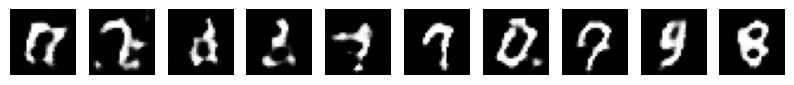

In [57]:
#Newly created output
plot_generated_images(generator,epochs=2000)